<a href="https://colab.research.google.com/github/EmmaCOo/ADS509_Text_Mining_Final_Project/blob/main/Final_Project_Txt_Mining_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADS509_TEXT_MINING_FINAL_PROJECT: CLASSIFICATION OF POTENTIAL BURGER CHAIN'S CUSTOMERS PER TWEETS**

## **GROUP_9:   EMMA OO, SINDHU BHATTARAI, SEAN TORRES**

## **10/25/2022**

## **Github Repository:** 

https://github.com/EmmaCOo/ADS509_Text_Mining_Final_Project



## **PROJECT OVERVIEW:**


### **Introduction**
This era the social media use has seen many fold of advancements where everything from service to marketing strategies has been digitized. The use of social media is increasing and there is abundance of information which can be of great use to provide an automated mechanism for business development. In this project we propose a classification model for classifying the text by using the users tweets from five burger chain's. The five burger chains are McDonalds, JackInTheBox, Sonic DriveIn, Wendy, and ShakeShack. After precise classification and topic modeling, the system classifies the user based on their post on Twitter to know about user interests on specific burger chains. This helps different burger chains to push the notification and digitized marketing strategies to specific customers.  


### **Project's Goal**
This project aims to classify the potential respective burger chain's customers for McDonalds, JackInTheBox, Sonic DriveIn, Wendy, and ShakeShack by using their tweets for each burger chain. The goal is to initially perform a supervised learning approach using our labeled data and build an optimal classification model. Additionally, topic modeling is carried out on data as an unsupervised approach for clustering the data. 


### **Data Acquistion:**
The approach is to use twitter API to pull the data using Tweepy. Two types of datasets of five burger chains are accumulated. One is customers' tweets for each burger chain and another is the respective responses from the chains itself. The customer tweets will be used to build a classification model and topic modeling. Moving forward, we will be comparing the word cloud for different burger chain's responses and customer tweets. 


### **Data Preparation:**
Prior to training a classifier the dataset is prepared by cleaning and balancing the classes. We have normalized the data by removing punctuation, removing stop words and case folding the data. After these normalizations we tokenized the data for feature generation. For balancing the dataset we have downsampled the classes which have higher frequency . Downsampling helped us to avoid overfitting the model and improve the accuracy as well.  


### **Classification Models**
Navies Bayes and Support Vector Machine (SVM) were trained as supervised classification models along Dummy classifier as Baseline model. Target classes were checked for class-imbalance. The accuracy of balanced and orignial datasets were compared to show the improvement of balancing the datasets. 


### **WordCloud**
Wordclouds of customer's tweets and responses from the restaruants were displayed to see the most common words. 


### **Topic Modelings**
Topic models with NMF, LSA, and LDA were performed to see the unique clsuters among five different burger chains. 


### **Results, Discussion, and Conclusion**
The results were discussed at the end of each section.

### **Discussion And Conclusion**
The discussion and conclusion were discussed at the end of the notebook. 

### **DATA ACQUISITION:  TWITTER API PULL USING TWEEPY**

In [2]:
#install tweepy higher than 4.0
# !pip install git+https://github.com/tweepy/tweepy.git

In [3]:
# !pip show tweepy

In [4]:
# #library installation 
import tweepy
import os
import requests
import csv
import pandas as pd
import numpy as np

In [5]:
#bringing the api keys 

from api_keys import api_key, api_key_secret, bearer_token



In [6]:
# #setup client
client = tweepy.Client(bearer_token,wait_on_rate_limit=True)

In [7]:
# #Fetch ID's with usernames
def fetch_ID(name):
    users = client.get_users(usernames=name)
    for user in users.data:
        return user.id

In [8]:
# #variable storage bin
name = ["McDonalds",'Wendys','sonicdrivein','JackBox','shakeshack']
mc_id = '71026122'
wendy_id='59553554'
sonic='40349928'
JackBox='18956020'
shakeshack='212255045'

### **DATA ACQUISTION OF CUSTOMER'S TWEETS**

In [9]:
# # Fastfood User Responce (message,ID, ,Likes) 

# MCDONALDS
tweet_fields=["public_metrics"]
message=[]
    #ID = []
like_count = []
for response in tweepy.Paginator(client.get_users_mentions,71026122, max_results=100,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        #ID.append(msg.id)
        like_count.append(str(msg.public_metrics.get('like_count')))

#Convert to dataframe test  - can skip or ignore
df = pd.DataFrame(message) 
df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('mac_c')

mac_c = pd.read_csv('/content/mac_c')

In [10]:
# # Fastfood User Responce (message,ID, ,Likes) 

# #WENDY
tweet_fields=["public_metrics"]
message=[]
    #ID = []
like_count = []
for response in tweepy.Paginator(client.get_users_mentions,59553554, max_results=100,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        #ID.append(msg.id)
        like_count.append(str(msg.public_metrics.get('like_count')))

#Convert to dataframe test  - can skip or ignore
df = pd.DataFrame(message) 
df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('wendy_c')

wendy_c = pd.read_csv('/content/wendy_c')

In [11]:
# # Fastfood User Responce (message,ID, ,Likes) 

#SONIC
tweet_fields=["public_metrics"]
message=[]
    #ID = []
like_count = []
for response in tweepy.Paginator(client.get_users_mentions,40349928, max_results=100,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        #ID.append(msg.id)
        like_count.append(str(msg.public_metrics.get('like_count')))

#Convert to dataframe test  - can skip or ignore
df = pd.DataFrame(message) 
df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('wendy_c')

wendy_c = pd.read_csv('/content/wendy_c')

In [12]:
# # Fastfood User Responce (message,ID, ,Likes) 

#JACKBOX
tweet_fields=["public_metrics"]
message=[]
    #ID = []
like_count = []
for response in tweepy.Paginator(client.get_users_mentions,18956020, max_results=100,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        #ID.append(msg.id)
        like_count.append(str(msg.public_metrics.get('like_count')))

#Convert to dataframe test  - can skip or ignore
df = pd.DataFrame(message) 
df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('jack_c')

jack_c = pd.read_csv('/content/jack_c')

In [13]:
# # Fastfood User Responce (message,ID, ,Likes) 

# #SHAKESHACK
tweet_fields=["public_metrics"]
message=[]
    #ID = []
like_count = []
for response in tweepy.Paginator(client.get_users_mentions,212255045, max_results=100,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        #ID.append(msg.id)
        like_count.append(str(msg.public_metrics.get('like_count')))

#Convert to dataframe test  - can skip or ignore
df = pd.DataFrame(message) 
df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('shake_c')

shake_c = pd.read_csv('/content/shake_c')

### **DATA ACQUISITION OF BURGER CHAIN'S REPSONSE TO CUSTOMERS' TWEETS**

In [15]:
# #for status in tweepy.Paginator(client.get_users_tweets,71026122,max_results=5, limit=1 ):
# #    for msg in response.data :
#  #       print(msg)
query = 'from:McDonalds -is:retweet'
tweet_fields=['author_id', 'created_at','id',"public_metrics"]        
message=[]
like_count = []
for response in tweepy.Paginator(client.search_recent_tweets,query,max_results=100,limit = 5,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        like_count.append(str(msg.public_metrics.get('like_count')))

#print method and put in df
df = pd.DataFrame(message) 
#df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('mac_restaurant')

In [16]:
# #Wendys
query = 'from:Wendys -is:retweet'
tweet_fields=['author_id', 'created_at','id',"public_metrics"]        
message=[]
like_count = []
for response in tweepy.Paginator(client.search_recent_tweets,query,max_results=100, limit=5,tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        like_count.append(str(msg.public_metrics.get('like_count')))

#print method and put in df
df = pd.DataFrame(message) 
#df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('wendy_restaurant')

In [17]:
# #sonicdrivein
query = 'from:sonicdrivein -is:retweet'
tweet_fields=['author_id', 'created_at','id',"public_metrics"]        
message=[]
like_count = []
for response in tweepy.Paginator(client.search_recent_tweets,query,max_results=100,limit = 5, tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        like_count.append(str(msg.public_metrics.get('like_count')))

#print method and put in df
df = pd.DataFrame(message) 
#df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('sonic_restaurant')

In [18]:
# #JackBox
query = 'from:JackBox -is:retweet'
tweet_fields=['author_id', 'created_at','id',"public_metrics"]        
message=[]
like_count = []
for response in tweepy.Paginator(client.search_recent_tweets,query,max_results=100,limit = 5, tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        like_count.append(str(msg.public_metrics.get('like_count')))

#print method and put in df
df = pd.DataFrame(message) 
#df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('jackbox_restaurant')

In [19]:
# #Jshakeshack
query = 'from:shakeshack -is:retweet'
tweet_fields=['author_id', 'created_at','id',"public_metrics"]        
message=[]
like_count = []
for response in tweepy.Paginator(client.search_recent_tweets,query,max_results=100,limit = 5, tweet_fields=tweet_fields):
    for msg in response.data :
        message.append(msg)
        like_count.append(str(msg.public_metrics.get('like_count')))

#print method and put in df
df = pd.DataFrame(message) 
#df = df.iloc[: , 1:]
df["likecount"]=like_count

csv_data = df.to_csv('shakeshack_restaurant')

In [20]:
!pip install emoji==1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 8.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=9e32ac5a8d321329a4e2ed90aec86cb12410eb122c580cb5a6cf532dbed29dfe
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
import nltk
nltk.download('stopwords')
sw = stopwords.words("english")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
import html 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sakshyamdahal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
punctuation = set(punctuation) # speeds up comparison

def remove_punc(text):
    text_nonpunc ="".join([char for char in text if char not in punctuation])
    return text_nonpunc

# Define Tokenization Function
#To keep the emojis while tokenizing
RE_TOKEN = re.compile(r"""
                   ( [#]?[@\w'’\.\-\:]*\w     # words, hashtags and email addresses
                   | [:;<]\-?[\)\(3]          # coarse pattern for basic text emojis
                   | [\U0001F100-\U0001FFFF]  # coarse code range for unicode emojis
                   )
                  """, re.VERBOSE)

def tokenize(text):
    return text.split()

# Define Stop Words Remove Function
stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stop(text):
    return [t for t in text if t not in stopwords]


# Define pipeline of lowering, no punctuation, tokenization, and removal of stopwords
pipeline = [str.lower, remove_punc,tokenize, remove_stop]
def prepare(text, pipeline): 
    tokens = text
    for transform in pipeline: tokens = transform(tokens)
    return tokens

### **Customers' Tweets Datasets**

In [5]:
#Sindhu's data path
# jackbox_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined_cust_data /jack_df.csv')
# mac_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined_cust_data /mac_df.csv')
# shake_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined_cust_data /shake_df.csv')
# sonic_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined_cust_data /sonic_df.csv')
# wendy_df =  pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined_cust_data /wendy_df.csv')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
#Emma's data paths
jackbox_df = pd.read_csv('/content/drive/MyDrive/TM_Final/jack_d.csv')
mac_df = pd.read_csv('/content/drive/MyDrive/TM_Final/mac_d.csv')
shake_df = pd.read_csv('/content/drive/MyDrive/TM_Final/shake_d.csv')
sonic_df = pd.read_csv('/content/drive/MyDrive/TM_Final/sonic_d.csv')
wendy_df =  pd.read_csv('/content/drive/MyDrive/TM_Final/wendy_d.csv')

In [6]:
#print the size of each data frame
print(jackbox_df.shape)
print(mac_df.shape)
print(shake_df.shape)
print(sonic_df.shape)
print(wendy_df.shape)

(1379, 9)
(2548, 9)
(942, 9)
(1009, 9)
(2065, 10)


In [7]:
#Add the class columns to each dataframe
jackbox_df['name'] = 'jackinthebox'
mac_df['name'] = 'mcdonalds'
shake_df['name'] = 'shakeshack'
sonic_df['name'] = 'sonic'
wendy_df['name'] = 'wendy'

In [8]:
#apply pipeline function to text of each cain
pipeline = [str.lower]
sonic_df['text']= sonic_df['text'].apply(prepare, pipeline = pipeline)
wendy_df['text']= wendy_df['text'].apply(prepare, pipeline = pipeline)
shake_df['text']= shake_df['text'].apply(prepare, pipeline = pipeline)
mac_df['text']= mac_df['text'].apply(prepare, pipeline = pipeline)
jackbox_df['text']= jackbox_df['text'].apply(prepare, pipeline = pipeline)

In [9]:
sonic_df.head()

,Unnamed: 0,Unnamed: 0.1,id,public_metrics,text,likecount,author_id,created_at,edit_history_tweet_ids,name
0,0,0,1582235419915476996,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@sonicdrivein i sent email to headquarters in ...,0,NaN,NaN,NaN,sonic
1,1,1,1582219830689951744,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","i'm at @sonicdrivein in mesa, az https://t.co/...",0,NaN,NaN,NaN,sonic
2,2,2,1582204583870242816,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@sonicdrivein i always come back for more thou...,0,NaN,NaN,NaN,sonic
3,3,3,1582203028022886400,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@cozyncrafty @sonicdrivein so precious 🤍,1,NaN,NaN,NaN,sonic
4,4,4,1582202412848513024,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",when we go to @sonicdrivein my dog watches peo...,3,NaN,NaN,NaN,sonic


In [10]:
# removing the name of burger chain from customer querys to the restaurant 

jackbox_df["text"] = jackbox_df["text"].str.replace("@jackbox", "")
mac_df["text"] = mac_df["text"].str.replace("@mcdonalds", "")
shake_df["text"] = shake_df["text"].str.replace("@shakeshack", "")
sonic_df["text"] = sonic_df["text"].str.replace("@sonicdrivein", "")
wendy_df["text"] = wendy_df["text"].str.replace("@wendys", "")

In [11]:
#Merge all dataframes
frames = [jackbox_df,mac_df, shake_df, sonic_df, wendy_df]
df = pd.concat(frames)
df.shape

(7943, 11)

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,id,public_metrics,text,likecount,author_id,created_at,edit_history_tweet_ids,name,lang
0,0,0,1582230967225577473,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",please mak3 the pakn gi away papa https://t.c...,0,NaN,NaN,NaN,jackinthebox,NaN
1,1,1,1582214160707776512,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",finally one of your stores are open…and then ...,0,NaN,NaN,NaN,jackinthebox,NaN
2,2,2,1582211038639898624,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",@migrantapp @fbilosangeles @interpol_cyber @tw...,0,NaN,NaN,NaN,jackinthebox,NaN
3,3,3,1582209921042460674,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",silas trying on his #halloweencostume #jackint...,2,NaN,NaN,NaN,jackinthebox,NaN
4,4,4,1582204138632331264,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",that is a monster taco https://t.co/tobg52ndil,0,NaN,NaN,NaN,jackinthebox,NaN


#### **DISTRIBUTION OF EACH CHAIN**

Text(0.5, 1.0, 'Distribution of Burger Chains')

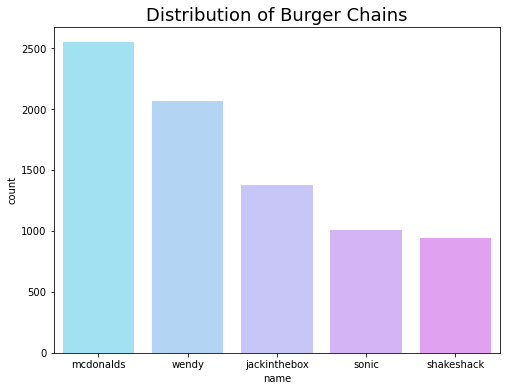

In [13]:
plt.figure(figsize=(8,6))
# countplot
sns.countplot( x = 'name', data = df, palette = 'cool', alpha = 0.5, order = df['name'].value_counts().index)
# Add title
plt.title('Distribution of Burger Chains', fontsize=18)

**In the above Bar Graph we can observe the class imbalance. The data is dominated highly by McDonalds, Wendy, and JackInTheBox classes which might create bias while model training.**

### **BALANCING THE DATASET**

**Since the class imbalance was observed, McDonalds, Wendy, and JackInTheBox datasets will be downsampled.  We also want to see the effects of class imbalance on the accuracy of the models.  Thus, we will work on two sepearate datasets (original unbalanced data and balanced dataset).** 

### **DOWN SAMPLING OF MCDONALDS, WENDY, AND JACK IN THE BOX**

In [14]:
#let's keep original dataset
#substract only description (text data) and classes
org_df = df[['text', 'name']]

In [15]:
#McDonalds
mac_messages = df[df["name"] == "mcdonalds"]  #downsample McDonalds
sonic_messages  = df[df["name"] == "sonic"]   #sonic samples as reference class
print(mac_messages.shape)
print(sonic_messages.shape)

(2548, 11)
(1009, 11)


In [16]:
from sklearn.utils import resample
mac_downsample = resample(mac_messages,
             replace=True,
             n_samples=len(sonic_messages),
             random_state=42)

print(mac_downsample.shape)

(1009, 11)


In [17]:
#Wendy
wendy_messages = df[df["name"] == "wendy"]

wendy_downsample = resample(wendy_messages,
             replace=True,
             n_samples=len(sonic_messages),
             random_state=42)

print(wendy_downsample.shape)

(1009, 11)


In [18]:
#Jack In The Box
jib_messages = df[df["name"] == "jackinthebox"]

jib_downsample = resample(jib_messages,
             replace=True,
             n_samples=len(sonic_messages),
             random_state=42)

print(jib_downsample.shape)

(1009, 11)


In [19]:
#Apply str on downsampled dataframes  
mac_downsample['text'].apply(str)
wendy_downsample['text'].apply(str)
jib_downsample['text'].apply(str)

1126                                     you complete me!
860      @padres @juansoto25_ please figure out how to...
1294     i tell ya what tweet me a digital coupon and ...
1130    when are you picking the 5 gamer jack finalist...
1095     i actually love those tacos. https://t.co/5aj...
                              ...                        
142     @cannabisgrower5  @grubhub @grubhub_care more ...
992        i aint readin all that https://t.co/zdqromaneh
664     dude  has the best bacon burgers no one can ch...
144          @cakeydrakey  lmao no that's how it came!! 😭
1248     damn look at this taco looks like the valdez ...
Name: text, Length: 1009, dtype: object

In [20]:
#Merge all dataframes
frames = [jib_downsample,mac_downsample, shake_df, sonic_df, wendy_downsample]
df = pd.concat(frames)
df.shape

(4978, 11)

Text(0.5, 1.0, 'Distribution of Burger Chains')

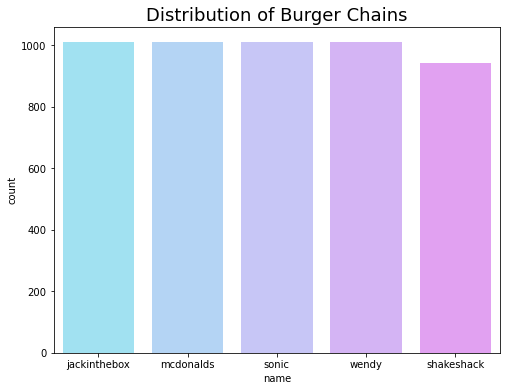

In [21]:
plt.figure(figsize=(8,6))

# countplot
sns.countplot( x = 'name', data = df, palette = 'cool', alpha = 0.5, order = df['name'].value_counts().index)

# Add title
plt.title('Distribution of Burger Chains', fontsize=18)

#### Let's work on orignial dataset and balanced datasets to see how balancing can improve the classification model's accuracy. 

### **Data Cleaning**

**Here the data cleaning is done using a pipeline which we defined initially in the notebook. We have normalized the data using functions str.lower, remove_punc,tokenize and remove_stop.**

In [22]:
#substract only descriptin (text data) and classes
text_df = df[['text','name']]
text_df.head()


,text,name
1126,you complete me!,jackinthebox
860,@padres @juansoto25_ please figure out how to...,jackinthebox
1294,i tell ya what tweet me a digital coupon and ...,jackinthebox
1130,when are you picking the 5 gamer jack finalist...,jackinthebox
1095,i actually love those tacos. https://t.co/5aj...,jackinthebox


In [23]:
#Pipleline_2 for text_mining functions
pipeline_2= [remove_punc,tokenize, remove_stop]

#orginial datset
org_df['tokens'] = org_df['text'].apply(prepare, pipeline = pipeline_2)

text_df['tokens'] = text_df['text'].apply(prepare, pipeline = pipeline_2)
text_df.head()

,text,name,tokens
1126,you complete me!,jackinthebox,[complete]
860,@padres @juansoto25_ please figure out how to...,jackinthebox,"[padres, juansoto25, please, figure, light, ho..."
1294,i tell ya what tweet me a digital coupon and ...,jackinthebox,"[tell, ya, tweet, digital, coupon, ill, retwee..."
1130,when are you picking the 5 gamer jack finalist...,jackinthebox,"[picking, 5, gamer, jack, finalists, 👀]"
1095,i actually love those tacos. https://t.co/5aj...,jackinthebox,"[actually, love, tacos, httpstco5ajd2pzbw3]"


### **Descriptive statistics**

**This section gives us the overview of our tokens words. We can analyze the count of the tokens, unique tokens, lexical diversity and number of characters in our text data and see if we have enough data points and diversity in words to build a model.**

In [24]:
#check any missing values
text_df.isna().sum()

text      0
name      0
tokens    0
dtype: int64

In [25]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    
    #filled na with whitespace to work with df and making sure it will
    #not be counted on frequent words
    tokens = [token for token in tokens if token not in ['', " "]]
    # Fill in the correct values here. 
    num_tokens =  len(tokens)
    num_unique_tokens = len(set(tokens)) #len(np.unique(tokens))
    lexical_diversity =  len(set(tokens)) / len(tokens) 
    num_characters =  sum([len(i) for i in tokens]) 
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5))

        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [26]:
# #Add the class columns to each dataframe
# jackbox_df['name'] = 'jackinthebox'
# mac_df['name'] = 'mcdonalds'
# shake_df['name'] = 'shakeshack'
# sonic_df['name'] = 'sonic'
# wendy_df['name'] = 'wendy'

In [27]:
#JACK IN THE BOX
jib_df = text_df[text_df['name'].str.contains('jackinthebox')]
token_jib = []
for i in jib_df['tokens']:
    token_jib.extend(i)    
print('Descriptive Stats of Jacj In the box follower description text token:')
descriptive_stats(token_jib)

#macdonals
mac_df = text_df[text_df['name'].str.contains('mcdonalds')]
token_mac = []
for i in mac_df['tokens']:
    token_mac.extend(i)
print('\n')
print('Descriptive Stats McDonals follower description text token:')
descriptive_stats(token_mac)

#Shakeshack
shake_df = text_df[text_df['name'].str.contains('shakeshack')]
token_shake = []
for i in shake_df['tokens']:
    token_shake.extend(i)
print('\n')
print('Descriptive Stats Shake Shack follower description text token:')
descriptive_stats(token_shake)

#Sonic
sonic_df = text_df[text_df['name'].str.contains('sonic')]
token_sonic = []
for i in sonic_df['tokens']:
    token_sonic.extend(i)
print('\n')
print('Descriptive Stats Sonic follower description text token:')
descriptive_stats(token_sonic)


#wendys
wendys_df = text_df[text_df['name'].str.contains('wendy')]
token_wendys = []
for i in wendys_df['tokens']:
    token_wendys.extend(i)
print('\n')
print('Descriptive Stats wendys follower description text token:')
descriptive_stats(token_wendys)


Descriptive Stats of Jacj In the box follower description text token:
There are 8703 tokens in the data.
There are 2847 unique tokens in the data.
There are 54286 characters in the data.
The lexical diversity is 0.327 in the data.
[('padres', 168), ('jack', 135), ('tacos', 106), ('get', 80), ('box', 61)]


Descriptive Stats McDonals follower description text token:
There are 14618 tokens in the data.
There are 3694 unique tokens in the data.
There are 117881 characters in the data.
The lexical diversity is 0.253 in the data.
[('nickadamsinusa', 115), ('bubbawallace', 108), ('dream', 105), ('theyluvgyro', 103), ('kirbisnthere', 103)]


Descriptive Stats Shake Shack follower description text token:
There are 10238 tokens in the data.
There are 4275 unique tokens in the data.
There are 65720 characters in the data.
The lexical diversity is 0.418 in the data.
[('shake', 96), ('shack', 82), ('burger', 81), ('like', 63), ('get', 62)]


Descriptive Stats Sonic follower description text token:

[8771, 3185, 0.36312849162011174, 56252]

In [28]:
org_df['tokens_str'] = org_df['tokens'].str.join(" ")

text_df['tokens_str'] = text_df['tokens'].str.join(" ")
text_df.head()

,text,name,tokens,tokens_str
1126,you complete me!,jackinthebox,[complete],complete
860,@padres @juansoto25_ please figure out how to...,jackinthebox,"[padres, juansoto25, please, figure, light, ho...",padres juansoto25 please figure light home run
1294,i tell ya what tweet me a digital coupon and ...,jackinthebox,"[tell, ya, tweet, digital, coupon, ill, retwee...",tell ya tweet digital coupon ill retweet monst...
1130,when are you picking the 5 gamer jack finalist...,jackinthebox,"[picking, 5, gamer, jack, finalists, 👀]",picking 5 gamer jack finalists 👀
1095,i actually love those tacos. https://t.co/5aj...,jackinthebox,"[actually, love, tacos, httpstco5ajd2pzbw3]",actually love tacos httpstco5ajd2pzbw3


### **SUPERVISED CLASSIFICATION MODELS**



### **TRAIN-TEST-SPLIT**

In [29]:
org_df.head()

,text,name,tokens,tokens_str
0,please mak3 the pakn gi away papa https://t.c...,jackinthebox,"[please, mak3, pakn, gi, away, papa, httpstcot...",please mak3 pakn gi away papa httpstcot2gzwch9aw
1,finally one of your stores are open…and then ...,jackinthebox,"[finally, one, stores, open…and, they’re, tryi...",finally one stores open…and they’re trying cha...
2,@migrantapp @fbilosangeles @interpol_cyber @tw...,jackinthebox,"[migrantapp, fbilosangeles, interpolcyber, twi...",migrantapp fbilosangeles interpolcyber twitter...
3,silas trying on his #halloweencostume #jackint...,jackinthebox,"[silas, trying, halloweencostume, jackinthebox...",silas trying halloweencostume jackinthebox coo...
4,that is a monster taco https://t.co/tobg52ndil,jackinthebox,"[monster, taco, httpstcotobg52ndil]",monster taco httpstcotobg52ndil


In [30]:
# ORIGINAL DATASET
Xo_train, Xo_test, Yo_train, Yo_test = train_test_split(org_df['tokens'],org_df['name'],test_size=0.2, random_state=42,
                                                    stratify=org_df['name'])
print('Size of Training Data ', Xo_train.shape[0])
print('Size of Test Data ', Xo_test.shape[0])

Size of Training Data  6354
Size of Test Data  1589


In [31]:
# BALANCED DATASET
X_train, X_test, Y_train, Y_test = train_test_split(text_df['tokens'],text_df['name'],test_size=0.2, random_state=42,
                                                    stratify=text_df['name'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  3982
Size of Test Data  996


### **Dummy Classifier (Baseline Model)**

In [32]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, Y_train)

# make predictions using fitted model
dummy_train_pred = dummy_clf.predict(X_train)
dummy_test_pred = dummy_clf.predict(X_test)

target_names = ['Jack In The Box','McDonals', 'Shake Shack','Sonic', 'Wendys']
dummy_cr = (classification_report(Y_test, dummy_test_pred))

print('Accuracy Score:', accuracy_score(Y_test, dummy_test_pred))
print('\n')
print(classification_report(Y_test, dummy_test_pred, target_names=target_names))

Accuracy Score: 0.20281124497991967


                 precision    recall  f1-score   support

Jack In The Box       0.20      1.00      0.34       202
       McDonals       0.00      0.00      0.00       202
    Shake Shack       0.00      0.00      0.00       188
          Sonic       0.00      0.00      0.00       202
         Wendys       0.00      0.00      0.00       202

       accuracy                           0.20       996
      macro avg       0.04      0.20      0.07       996
   weighted avg       0.04      0.20      0.07       996



### **Naive Bayes**

In [33]:
org_df_test = org_df[['tokens_str','name']]
org_df_list =  org_df_test.values.tolist()

text_df_test = text_df[['tokens_str','name']]
text_df_list =  text_df_test.values.tolist()

In [34]:
word_cutoff = 0

tokens = [w for t, p in text_df_list for w in t.split()]
# tokens = [i for i in tokens if not i in sw] 

word_dist = nltk.FreqDist(tokens)

feature_words = set()

for word, count in word_dist.items() :
    if count > word_cutoff :
        feature_words.add(word)
        
print(f"With a word cutoff of {word_cutoff}, we have {len(feature_words)} as features in the model.")

With a word cutoff of 0, we have 12139 as features in the model.


In [35]:
def conv_features(text,fw) :
    
    ret_dict = dict()
    token = text.lower().split()
    for word in token:
        if word in fw:
            ret_dict[word] = 1
        else:
            ret_dict[word] = 0
        
    return(ret_dict)

In [36]:
org_df.shape, text_df.shape

((7943, 4), (4978, 4))

#### **ORIGINAL DATASET**

In [37]:
random_state = 12345

org_featuresets = [(conv_features(tokens_str,feature_words), name) for (tokens_str, name) in org_df_list]

test_size = 1589  #test size 20% 

test_set, train_set = org_featuresets[:test_size], org_featuresets[test_size:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set)*100)

11.642542479546885


### **BALANCED DATASET**

In [38]:
random_state = 12345

featuresets = [(conv_features(tokens_str,feature_words), name) for (tokens_str, name) in text_df_list]

test_size = 996  #test size 20% 

test_set, train_set = featuresets[:test_size], featuresets[test_size:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set)*100)

74.49799196787149


### **TF-IDF VECTORIZATION**

In [39]:
#ORIGINAL DATASET
Xo_train = Xo_train.astype(str)
Xo_test = Xo_test.astype(str)

tfidf = TfidfVectorizer(min_df = 1, ngram_range=(1,2), stop_words="english")
Xo_train_tf = tfidf.fit_transform(Xo_train)

Xo_test_tf = tfidf.transform(Xo_test)

In [40]:
#BALANCED DATASET
X_train = X_train.astype(str)
X_test = X_test.astype(str)

tfidf = TfidfVectorizer(min_df = 1, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

X_test_tf = tfidf.transform(X_test)

In [41]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

tfidf = TfidfVectorizer(min_df = 1, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

X_test_tf = tfidf.transform(X_test)

### **SUPPORT VECTOR MACHINE (SVM)** 

In [42]:
from sklearn import svm
from sklearn.svm import SVC

cls = svm.SVC(kernel="linear", gamma="auto", C=2)

### **ORIGINAL DATASET**

In [43]:
cls.fit(Xo_train_tf, Yo_train)
yo_predict = cls.predict(Xo_test_tf)

print('Accuracy Score:', accuracy_score(Yo_test, yo_predict))
print('\n')
print(classification_report(Yo_test, yo_predict, target_names=target_names))

Accuracy Score: 0.7243549402139711


                 precision    recall  f1-score   support

Jack In The Box       0.76      0.65      0.70       276
       McDonals       0.73      0.85      0.78       510
    Shake Shack       0.67      0.51      0.58       188
          Sonic       0.79      0.61      0.69       202
         Wendys       0.70      0.78      0.74       413

       accuracy                           0.72      1589
      macro avg       0.73      0.68      0.70      1589
   weighted avg       0.73      0.72      0.72      1589



### **BALANCED DATASET**

In [44]:
cls.fit(X_train_tf, Y_train)
y_predict = cls.predict(X_test_tf)

print('Accuracy Score:', accuracy_score(Y_test, y_predict))
print('\n')
print(classification_report(Y_test, y_predict, target_names=target_names))

Accuracy Score: 0.7439759036144579


                 precision    recall  f1-score   support

Jack In The Box       0.79      0.76      0.77       202
       McDonals       0.88      0.84      0.86       202
    Shake Shack       0.63      0.74      0.68       188
          Sonic       0.70      0.66      0.68       202
         Wendys       0.74      0.72      0.73       202

       accuracy                           0.74       996
      macro avg       0.75      0.74      0.74       996
   weighted avg       0.75      0.74      0.75       996



### **PERFORMANCE METRICS FOR CLASSIFICATION MODELS**

In [45]:
labels = [1,2,3,4]

models = [dummy_test_pred, y_predict]
accuracy = []

for i in models: 
  accuracy_scores = accuracy_score(i, Y_test)
  accuracy.append(accuracy_scores)

In [46]:
#create accuracy table

data = [['Baseline','20.3'], 
        ['Original_Naives_Bayes','11.6'],
        ['Balanced_Naives_Bayes','74.5'], 
        ['Original_SVM','72.4'], 
        ['Balanced_SVM','74.4']]

col_names = ["Models", "Accuracy_score"]

accuracy_table = pd.DataFrame(data, columns = col_names)
accuracy_table

,Models,Accuracy_score
0,Baseline,20.3
1,Original_Naives_Bayes,11.6
2,Balanced_Naives_Bayes,74.5
3,Original_SVM,72.4
4,Balanced_SVM,74.4


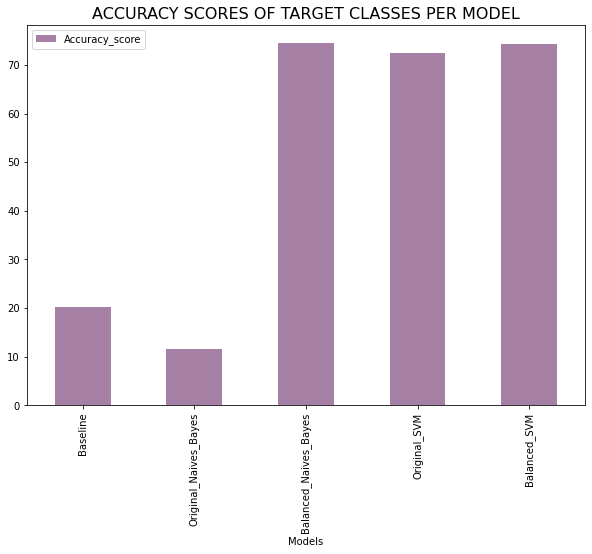

In [47]:
#Bargraph for Comparison of Accuracy for Each Model

accuracy_table['Accuracy_score']=accuracy_table['Accuracy_score'].astype(float)
accuracy_table.plot(x="Models", y= ['Accuracy_score'], kind = 'bar',figsize = (10,7), colormap = 'BuPu_r', alpha = 0.5)
plt.title('ACCURACY SCORES OF TARGET CLASSES PER MODEL', size = 16)
plt.show()

### **RESULT OF CLASSIFICATION MODELS**
 
The accuracy of the baseline model was 20.3%.  Naives Bayes'classifier was performed on both original and balanced dataset using 20% test-size. The accuracy for the unbalanced dataset was 11.6% while the balanced dataset yields 74.5%.
 
 
The datasets were then split as train and test data with 80:20% ratio.  Then they were transformed using TF-IDF vectorization. SVM's accuracy of the original data set was 72.4 while the balanced data set was 74.4.
 
For Naives Bayes classifier, balancing the dataset improves the accuracy (from 11.6% to 74.5%) drastically.  For SVM, the accuracies show very similar for both original and balanced datasets suggesting that TF-IDF vectorization can possibly be a compromised approach for unbalanced dataset.
 
Overall, Naives Bayes with the balanced dataset and SVM of both datasets yield the similar accuracy of around 74.5% with only difference of balancing and TF-IDF vectorization. These results suggest that one can choose Naives Bayes as a preferred model since TF-IDF vectorization can be computationally long, especially for larger datasets.
 


### Optimal Model Most informative features

Here are the top 15 features used by naive bayes for its model. 

In [48]:

classifier.show_most_informative_features(15)



Most Informative Features
                   sonic = 1               sonic : mcdona =     77.7 : 1.0
                    aint = 1              jackin : mcdona =     72.1 : 1.0
                   angry = 1              jackin : mcdona =     72.1 : 1.0
                 burgers = 1              jackin : mcdona =     72.1 : 1.0
                    dash = 1              jackin : wendy  =     72.1 : 1.0
                delivery = 1              jackin : wendy  =     72.1 : 1.0
                    door = 1              jackin : wendy  =     72.1 : 1.0
                   drink = 1              jackin : mcdona =     72.1 : 1.0
               expensive = 1              jackin : wendy  =     72.1 : 1.0
                   gross = 1              jackin : mcdona =     72.1 : 1.0
                 grubhub = 1              jackin : sonic  =     72.1 : 1.0
                    melt = 1              jackin : wendy  =     72.1 : 1.0
                    mind = 1              jackin : sonic  =     72.1 : 1.0

### **WORDCLOUD FOR EACH BURGER CHAIN**


In [49]:
# Define function to create wordcloud:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

        
   # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

Text(0.5, 1.0, 'Wendys WordCloud')

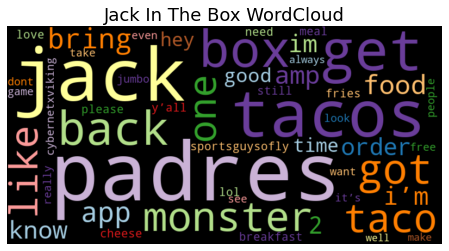

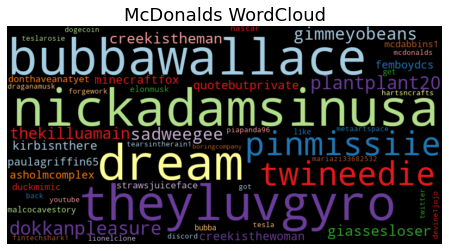

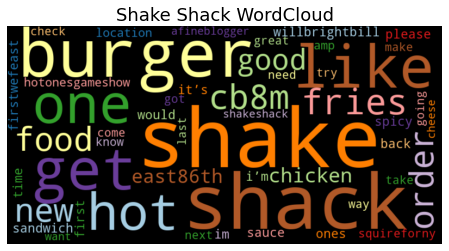

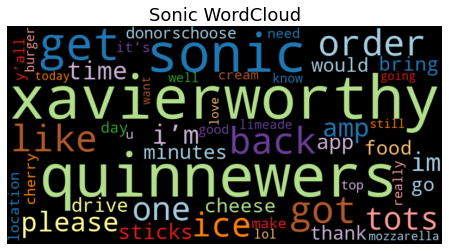

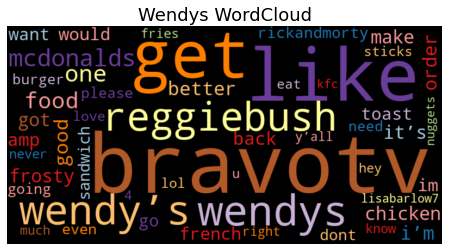

In [50]:
from wordcloud import WordCloud 

plt.figure(figsize=(8,4))
jib_wd= count_words(text_df[text_df['name']=='jackinthebox'])
wordcloud(jib_wd['freq'], max_words= 50)
plt.title('Jack In The Box WordCloud', size = 18)

plt.figure(figsize=(8,4))
mac_wd= count_words(text_df[text_df['name']=='mcdonalds'])
wordcloud(mac_wd['freq'], max_words= 50)
plt.title('McDonalds WordCloud', size = 18)

plt.figure(figsize=(8,4))
shake_wd= count_words(text_df[text_df['name']=='shakeshack'])
wordcloud(shake_wd['freq'], max_words= 50)
plt.title('Shake Shack WordCloud', size = 18)

plt.figure(figsize=(8,4))
sonic_wd= count_words(text_df[text_df['name']=='sonic'])
wordcloud(sonic_wd['freq'], max_words= 50)
plt.title('Sonic WordCloud', size = 18)

plt.figure(figsize=(8,4))
wendys_wd= count_words(text_df[text_df['name']=='wendy'])
wordcloud(wendys_wd['freq'], max_words= 50)
plt.title('Wendys WordCloud', size = 18)



### **RESULT OF WORDCLOUDS FOR EACH CHAIN**
 
For Jack In The Box, the prominent words were 'padres', 'jack', 'box', 'taco', 'like taco', 'bring', etc. Among them, the most informative word appears to be 'taco'. It's suggestive that Taco seems to be the famous menu item from the Jack In The Box.
 
 
For McDonalds, the most appeared words seem to be the most tweeted user's names.
 
 
For Shake Shack, 'chicken', 'burger' and 'fries' seem to be the most tweeted words.
 
 
For Sonic Drivein, 'ice', 'sticks', 'burger','tots' appear to be the most common words people tweet.
 
 
For Wendy, 'frosty', 'sandwich', 'burger' are the most tweeted menu-related words. In addition, 'mcdonalds' name appear as well suggesting the comparison tweets between Wendy and McDonalds burger chains.
 
 
The only negative word appears to be 'monster' from the Jack In The Box's wordcloud. Overall, the wordclouds for each chain show menu-related words, user's names, and positive words such as 'like', 'good', 'better', etc.
 



###**BURGER CHAIN'S RESPONSE DATASETS**

In [52]:
# #Sindhu's data path
# jackbox_rest_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined-rest-data/jack_rest_df.csv')
# mac_rest_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined-rest-data/mac_rest_df.csv')
# shake_rest_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined-rest-data/shake_rest_df.csv')
# sonic_rest_df = pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined-rest-data/sonic_rest_df.csv')
# wendy_rest_df =  pd.read_csv('/Users/sakshyamdahal/Desktop/MS_Data_Science/Text mining/Final_projeect/Sindhu_version /combined-rest-data/wendys_rest_df.csv')


In [71]:
#Emma's data path
jackbox_rest_df = pd.read_csv('/content/drive/MyDrive/TM_Final/jack_rest_df.csv')
mac_rest_df = pd.read_csv('/content/drive/MyDrive/TM_Final/mac_rest_df.csv')
shake_rest_df = pd.read_csv('/content/drive/MyDrive/TM_Final/shake_rest_df.csv')
sonic_rest_df = pd.read_csv('/content/drive/MyDrive/TM_Final/sonic_rest_df.csv')
wendy_rest_df =  pd.read_csv('/content/drive/MyDrive/TM_Final/wendys_rest_df.csv')

In [53]:
print(jackbox_rest_df.shape)
print(mac_rest_df.shape)
print(shake_rest_df.shape)
print(sonic_rest_df.shape)
print(wendy_rest_df.shape)

(2064, 9)
(3093, 9)
(100, 9)
(120, 9)
(27, 9)


In [54]:
#Add the class columns to each dataframe
jackbox_rest_df['name'] = 'jackinthebox'
mac_rest_df['name'] = 'mcdonalds'
shake_rest_df['name'] = 'shakeshack'
sonic_rest_df['name'] = 'sonic'
wendy_rest_df['name'] = 'wendy'

In [55]:
pipeline = [str.lower]
sonic_rest_df['text']= sonic_rest_df['text'].apply(prepare, pipeline = pipeline)
wendy_rest_df['text']= wendy_rest_df['text'].apply(prepare, pipeline = pipeline)
shake_rest_df['text']= shake_rest_df['text'].apply(prepare, pipeline = pipeline)
mac_rest_df['text']= mac_rest_df['text'].apply(prepare, pipeline = pipeline)
jackbox_rest_df['text']= jackbox_rest_df['text'].apply(prepare, pipeline = pipeline)

In [56]:
# removing the name of burger chain from customer querys to the restaurant 

jackbox_rest_df["text"] = jackbox_rest_df["text"].str.replace("@jackbox", "")
mac_rest_df["text"] = mac_rest_df["text"].str.replace("@mcdonalds", "")
shake_rest_df["text"] = shake_rest_df["text"].str.replace("@shakeshack", "")
sonic_rest_df["text"] = sonic_rest_df["text"].str.replace("@sonicdrivein", "")
wendy_rest_df["text"] = wendy_rest_df["text"].str.replace("@wendys", "")

In [57]:
 #Merge all dataframes
frames = [jackbox_rest_df,mac_rest_df, shake_rest_df, sonic_rest_df, wendy_rest_df]
df_restaurant = pd.concat(frames)
df_restaurant.shape

(5404, 10)

In [58]:
pipeline_2= [remove_punc,tokenize, remove_stop]

df_restaurant['tokens'] = df_restaurant['text'].apply(prepare, pipeline = pipeline_2)
df_restaurant.head()

,Unnamed: 0,Unnamed: 0.1,author_id,created_at,edit_history_tweet_ids,id,public_metrics,text,likecount,name,tokens
0,0,0,18956020,2022-10-20 05:35:47+00:00,[1582968803121827841],1582968803121827841,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","@galaxian_11 ahhhhhh! that's scream for ""we'll...",0,jackinthebox,"[galaxian11, ahhhhhh, thats, scream, well, rem..."
1,1,1,18956020,2022-10-20 05:35:42+00:00,[1582968780954533889],1582968780954533889,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","@ramirezrobertoe ahhhhhh! that's scream for ""w...",0,jackinthebox,"[ramirezrobertoe, ahhhhhh, thats, scream, well..."
2,2,2,18956020,2022-10-20 05:32:08+00:00,[1582967882799284224],1582967882799284224,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","@aunitedfan4 ahhhhhh! that's scream for ""we'll...",0,jackinthebox,"[aunitedfan4, ahhhhhh, thats, scream, well, re..."
3,3,3,18956020,2022-10-20 05:29:13+00:00,[1582967150817730560],1582967150817730560,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","@lin_keo1 ahhhhhh! that's scream for ""we'll re...",0,jackinthebox,"[linkeo1, ahhhhhh, thats, scream, well, remind..."
4,4,4,18956020,2022-10-20 05:18:24+00:00,[1582964427800051712],1582964427800051712,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","@nfinte1 ahhhhhh! that's scream for ""we'll rem...",1,jackinthebox,"[nfinte1, ahhhhhh, thats, scream, well, remind..."


### **WORDCLOUDS FOR EACH BURGER CHAIN'S REPSONSE TO CUSTOMERS' TWEETS**

Text(0.5, 1.0, 'Wendys Reply')

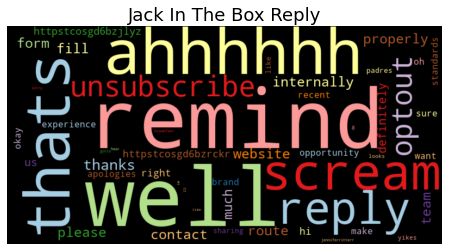

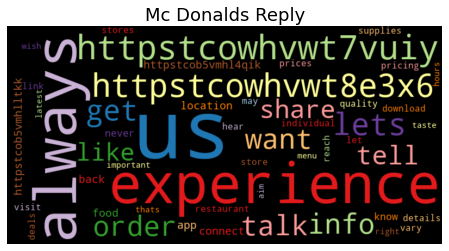

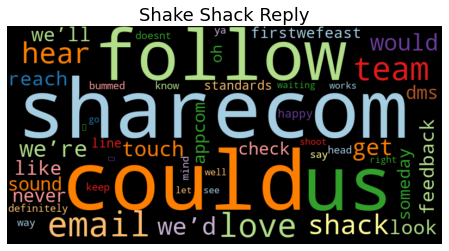

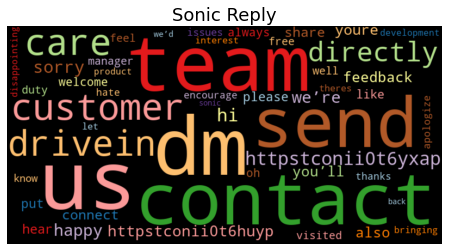

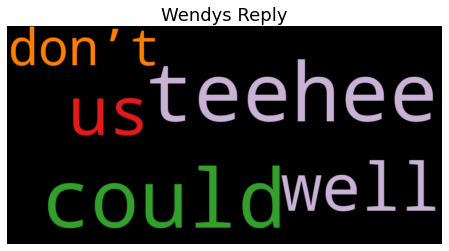

In [59]:
from wordcloud import WordCloud 

plt.figure(figsize=(8,4))
jib_wd= count_words(df_restaurant[df_restaurant['name']=='jackinthebox'])
wordcloud(jib_wd['freq'], max_words= 50)
plt.title("Jack In The Box Reply", size = 18)

plt.figure(figsize=(8,4))
mac_wd= count_words(df_restaurant[df_restaurant['name']=='mcdonalds'])
wordcloud(mac_wd['freq'], max_words= 50)
plt.title("Mc Donalds Reply", size = 18)

plt.figure(figsize=(8,4))
shake_wd= count_words(df_restaurant[df_restaurant['name']=='shakeshack'])
wordcloud(shake_wd['freq'], max_words= 50)
plt.title("Shake Shack Reply", size = 18)

plt.figure(figsize=(8,4))
sonic_wd= count_words(df_restaurant[df_restaurant['name']=='sonic'])
wordcloud(sonic_wd['freq'], max_words= 50)
plt.title("Sonic Reply", size = 18)

plt.figure(figsize=(8,4))
wendys_wd= count_words(df_restaurant[df_restaurant['name']=='wendy'])
wordcloud(wendys_wd['freq'], max_words= 50)
plt.title("Wendys Reply", size = 18)

### **RESULT OF WORDCLOUDS FOR EACH CHAIN's REPLY**
 
 
 
The above wordcloud display how each burger chain responds to the customer's tweets.
 
'Remind', 'experience', 'follow', 'share' are the words used by restaurant chains to respond to the customer's tweets.
 
As we saw in the shape of the data frames of each restaurant chain's replies, API pulls from the restaurant chains were limited.  We were able to pull only one week's Tweets for each chain. Among them, Wendy has only 27 tweets. Thus, the wordcloud displays only five words for Wendy suggesting that tweets about Wendy are very minimal.
 



### **TOPIC MODELING**

In [60]:
!pip install pyLDAvis

In [61]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models

In [62]:
 #Countvectorizer without word counts less than 5 and more than 70%
from sklearn.feature_extraction.text import CountVectorizer

count_text_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7) 
count_text_vectors = count_text_vectorizer.fit_transform(text_df["text"])
count_text_vectors.shape

(4978, 1808)

In [63]:
#TF-IDF (same parameters as CountVectorizer)
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(text_df['text'])
tfidf_text_vectors.shape

(4978, 1808)

####**NMF MODEL**

In [64]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

In [65]:
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
nmf_text_model = NMF(n_components=5, random_state=314)  #n_components =5 for five_topic to be detected by NMF
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

In [66]:
#summary of the topics that NMF detected in the text 
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names())


Topic 00
  co (24.40)
  https (24.39)
  reggiebush (0.71)
  thanks (0.59)
  love (0.58)

Topic 01
  theyluvgyro (4.09)
  creekistheman (4.09)
  twineedie (4.09)
  plantplant20 (4.09)
  dokkanpleasure (4.09)

Topic 02
  xavierworthy (23.59)
  quinnewers (23.54)
  sonic (2.53)
  tots (2.36)
  lol (2.24)

Topic 03
  padres (31.18)
  jack (5.49)
  sportsguysofly (3.84)
  so_cal_chica (3.13)
  box (2.55)

Topic 04
  back (2.07)
  get (1.92)
  bring (1.42)
  please (1.07)
  like (1.04)


In [67]:
topic_to_category = defaultdict(list)

for idx, row in enumerate(W_text_matrix) : 
  topic = np.where(row == np.amax(row))[0] 
  category = text_df["name"].iloc[idx]
  topic_to_category[topic[0]].append(category)

In [68]:
for topic, categories in topic_to_category.items() :
  print(f"For topic {topic} there are {len(categories)} documents.") 
  print(Counter(categories).most_common(5))
  print('\n')

For topic 4 there are 3165 documents.
[('wendy', 735), ('mcdonalds', 684), ('shakeshack', 634), ('jackinthebox', 569), ('sonic', 543)]


For topic 3 there are 193 documents.
[('jackinthebox', 182), ('wendy', 5), ('shakeshack', 3), ('sonic', 2), ('mcdonalds', 1)]


For topic 0 there are 1323 documents.
[('shakeshack', 303), ('sonic', 297), ('wendy', 262), ('jackinthebox', 254), ('mcdonalds', 207)]


For topic 2 there are 181 documents.
[('sonic', 167), ('wendy', 7), ('jackinthebox', 3), ('mcdonalds', 2), ('shakeshack', 2)]


For topic 1 there are 116 documents.
[('mcdonalds', 115), ('jackinthebox', 1)]




####**LSA MODEL**

In [69]:
from sklearn.decomposition import TruncatedSVD

svd_para_model = TruncatedSVD(n_components = 5, random_state=42)
W_svd_para_matrix = svd_para_model.fit_transform(tfidf_text_vectors)
H_svd_para_matrix = svd_para_model.components_

#display 5 topic models
display_topics(svd_para_model, tfidf_text_vectorizer.get_feature_names())


Topic 00
  co (15.70)
  https (15.70)
  love (0.53)
  padres (0.52)
  get (0.51)

Topic 01
  dokkanpleasure (4.06)
  theyluvgyro (4.06)
  sad_weegee (4.06)
  kirb_isnt_here (4.06)
  quotebutprivate (4.06)

Topic 02
  xavierworthy (11.72)
  quinnewers (11.69)
  get (2.39)
  sonic (1.47)
  lol (1.33)

Topic 03
  padres (6.63)
  get (1.96)
  jack (1.90)
  back (1.72)
  bring (1.20)

Topic 04
  padres (4.15)
  quinnewers (0.72)
  xavierworthy (0.72)
  sportsguysofly (0.53)
  so_cal_chica (0.42)


In [70]:
lsa_topic_to_category = defaultdict(list)
for idx, row in enumerate(W_svd_para_matrix) : 
  topic = np.where(row == np.amax(row))[0] 
  category = text_df["name"].iloc[idx]
  lsa_topic_to_category[topic[0]].append(category)

In [71]:
for topic, categories in lsa_topic_to_category.items() : 
  print(f"For topic {topic} there are {len(categories)} documents.") 
  print(Counter(categories).most_common(5))
  print('\n')

For topic 3 there are 2948 documents.
[('jackinthebox', 694), ('wendy', 648), ('mcdonalds', 612), ('shakeshack', 560), ('sonic', 434)]


For topic 0 there are 1578 documents.
[('shakeshack', 362), ('sonic', 341), ('wendy', 328), ('jackinthebox', 284), ('mcdonalds', 263)]


For topic 2 there are 308 documents.
[('sonic', 232), ('wendy', 25), ('jackinthebox', 22), ('shakeshack', 17), ('mcdonalds', 12)]


For topic 1 there are 127 documents.
[('mcdonalds', 121), ('jackinthebox', 4), ('shakeshack', 1), ('wendy', 1)]


For topic 4 there are 17 documents.
[('wendy', 7), ('jackinthebox', 5), ('shakeshack', 2), ('sonic', 2), ('mcdonalds', 1)]




####**LDA MODEL**

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

lda_text_model = LatentDirichletAllocation(n_components = 5, random_state=42)
W_lda_para_matrix = lda_text_model.fit_transform(count_text_vectors)
H_lda_para_matrix = lda_text_model.components_

display_topics(lda_text_model, count_text_vectorizer.get_feature_names())


Topic 00
  twitter (1.24)
  youtube (1.09)
  tesla (0.93)
  dogecoin (0.92)
  elonmusk (0.91)

Topic 01
  nickadamsinusa (2.32)
  dream (2.12)
  kirb_isnt_here (2.08)
  dokkanpleasure (2.08)
  gimme_yo_beans (2.08)

Topic 02
  one (1.54)
  jack (1.54)
  food (1.35)
  tacos (1.10)
  bubbawallace (1.04)

Topic 03
  like (1.72)
  padres (1.65)
  get (1.38)
  would (1.14)
  order (1.11)

Topic 04
  co (9.97)
  https (9.94)
  xavierworthy (1.18)
  quinnewers (1.18)
  get (1.14)


In [73]:
lda_topic_to_category = defaultdict(list)
for idx, row in enumerate(W_lda_para_matrix) : 
  topic = np.where(row == np.amax(row))[0]
  category = text_df["name"].iloc[idx]
  lda_topic_to_category[topic[0]].append(category)

In [74]:
for topic, categories in lda_topic_to_category.items() : 
  print(f"For topic {topic} there are {len(categories)} documents.") 
  print(Counter(categories).most_common(5))
  print('\n')

For topic 1 there are 365 documents.
[('mcdonalds', 148), ('wendy', 115), ('jackinthebox', 49), ('sonic', 30), ('shakeshack', 23)]


For topic 3 there are 1016 documents.
[('jackinthebox', 251), ('mcdonalds', 224), ('shakeshack', 193), ('wendy', 181), ('sonic', 167)]


For topic 2 there are 1177 documents.
[('jackinthebox', 326), ('mcdonalds', 273), ('wendy', 246), ('shakeshack', 192), ('sonic', 140)]


For topic 4 there are 1845 documents.
[('sonic', 597), ('shakeshack', 388), ('wendy', 364), ('jackinthebox', 253), ('mcdonalds', 243)]


For topic 0 there are 575 documents.
[('shakeshack', 146), ('jackinthebox', 130), ('mcdonalds', 121), ('wendy', 103), ('sonic', 75)]




In [75]:
lda_display = pyLDAvis.sklearn.prepare(lda_text_model, count_text_vectors, count_text_vectorizer, sort_topics=False)

In [76]:
pyLDAvis.display(lda_display)

### **RESULTS OF TOPIC MODELINGS**
 
**NMF MODEL:**
 
By NMF topic model, topic 00 seems to be related with Wendys with words 'reggiebush','love' which can be seen in the wordcloud of wendys. Topic 01 seems to reesemble Mc Donalds with words 'twineedie', 'plantplant20' which can be seen in the word clouds of Mc Donalds  . Topic 02 seems to be related to Sonic with words 'sonic', 'tots' while Topic 03 related to Jack In The Box with 'jack', 'box' words. Topic 04 seems related to "Shake Shack" with words 'back', 'please','get'and 'bring'. 
 
**LSA MODEL**
 
By LSA model, all topics are not very informative since most are filled with word 'padres' which occurs mostly in Jack-In-the-Box. The tokens of most topics does not reesemble a specific cluster.
 
**LDA MODEL**
 
By LDA model, topic 00 seems related to social media culture with words 'twitter', 'youtube', 'tesla', 'dogecoin', 'elonmusk'. Topic 01 seems to resemble user handles information. 
Topic 02 and Topic 03 both seems to  be related with Jack In The Box chain with words 'jack', 'taco', 'food', 'padres'. Topic 04 is mostly inclined towards links and requests made by customers. LDA is providing a neat classification but the topics which we are looking for is not resembled by LDA. 
 
Overall NMF and LDA perform better than the LSA model. But if we compare it with our original corpus(restaurants), we can rely on NMF model which closely matches our original corpus. 

**pyLDAvis**
 
From the pyLDAvis display, topics 1 and 2 are unique clusters while topic 3, 4, and 5 overlap almost entirely with each other. Topic 1 displays words like 'twitter', 'youtube', 'elonmusk', 'netflix', 'spacex','dogecoin' along with the user's names. Topic 1 seems to suggest recent news/tweets and social media related posts. Topic 2 is mostly filled with user's names.  Topic 3, 4, 5 are filled with restaurant-related words such as 'chicken', 'burger', 'sandwich', etc. 
 



### **DISCUSSION**

Initial plan of this project was to pull 100,000 followers from each burger chain and classify them into their respective preferred burger chain using their Twitter's descriptions. After performing the classification models with Naives Bayes and SVM along with the baseline model, it was noted that the accuracy was as low as the baseline model with 20%.  Since there's no correlation between the user's descriptions and target burger chains, we decided to approach another strategy of pulling the Tweets from both customers and restaurant chains. The user’s tweets were used as a classification and topic modelings while restaurant's tweets/responses were used for building the word clouds. 
 
Classification models were trained using the Naives Bayes and SVM.  As discussed in the results section, balancing the target classes improves the accuracy drastically while TF-IDF with SVM yield the same results with or without balanced dataset. Thus, Naives Bayes works well with a balanced data set while TF-IDF yields the same accuracy score for both balanced datasets. 
 
Wordclouds are built for customers’ tweets and restaurant’s responses.  The wordclouds reveals informations such as most tweeted menu-related words and positive words people tweet about each restaurant chain. 
 
For topic modeling, NMF and LDA perform better than LSA model with two distinct topic models. From the pyLDAvis display, the clusters of each restaurant chain overlap each other. 
 
Thus, classification models work better for topic models for this dataset. 
 



### **FUTURE RECOMMENDATIONS**

The project's major limitation was the extraction of timeline data. Twitter limited us on extracting the information from its API without the academic access. Due to the time constraint and lack of research profile from the university, we could not get the approval of Twitter API academic access. In future the access can be applied and approved with proper resources and more data can be acquired.

Additionally, we had the problem of class imbalance and bias models. This imbalance occurred due to the size of the restaurants, its popularity and customer response in Twitter. For balancing we performed downsampling to avoid bias classification models which resulted in data loss. For future research, more data and samples could be extracted using excess to timeline data to obtain more reliable results. 


### **EXAMPLE CLASSIFICATION PER USER'S TWEETS USING OPTIMAL MODEL NAIVES BAYES**  


In [77]:
#example input
my_sentence_1 = 'Time for taco and fries'

In [78]:
print(classifier.classify(dict([token, True] for token in my_sentence_1)))

jackinthebox


In [79]:
#example input 2
my_sentence_2 = 'tots'

In [80]:
print(classifier.classify(dict([token, True] for token in my_sentence_2)))

wendy


In [81]:
#example input 3
my_sentence_3 = 'party with burger and fries'

In [82]:
print(classifier.classify(dict([token, True] for token in my_sentence_3)))

jackinthebox
